In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import P_binary

%matplotlib inline

### Compare binary separation, eccentricity distributions

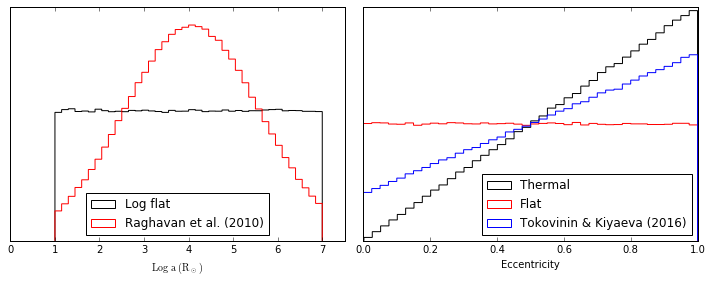

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

num_sys = 1000000


# Orbital Separation
a_sep_log_flat = P_binary.get_a(num_sys=num_sys, prob='log_flat')
a_sep_raghavan = P_binary.get_a(num_sys=num_sys, prob='raghavan')

ax[0].hist(np.log10(a_sep_log_flat), histtype='step', color='k', bins=40, normed=True, label='Log flat')
ax[0].hist(np.log10(a_sep_raghavan), histtype='step', color='r', bins=40, normed=True, label='Raghavan et al. (2010)')

ax[0].set_xlim(0.0, 7.5)
ax[0].set_xlabel(r'${\rm Log\ a}\ ({\rm R}_\odot)$')
ax[0].set_yticks([])
ax[0].legend(loc=8)


# Orbital Eccentricity
e_thermal = P_binary.get_e(num_sys=num_sys, prob='thermal')
e_flat = P_binary.get_e(num_sys=num_sys, prob='flat')
e_tokovinin = P_binary.get_e(num_sys=num_sys, prob='tokovinin')

ax[1].hist(e_thermal, histtype='step', color='k', bins=40, normed=True, label='Thermal')
ax[1].hist(e_flat, histtype='step', color='r', bins=40, normed=True, label='Flat')
ax[1].hist(e_tokovinin, histtype='step', color='b', bins=40, normed=True, label='Tokovinin & Kiyaeva (2016)')

ax[1].legend(loc=4)
ax[1].set_yticks([])
ax[1].set_xlabel('Eccentricity')

plt.tight_layout()
plt.savefig('../figures/P_orb_ecc_distributions.pdf')
#plt.show()

### Compare different s-Delta V distributions

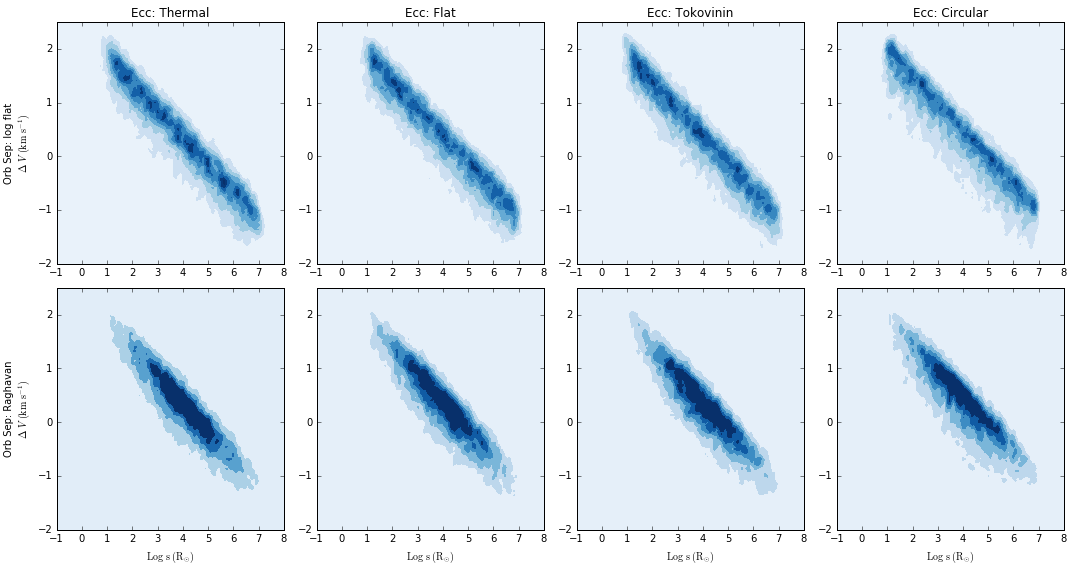

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(15,8))

def create_binary_dist_plot(ecc_prob, a_prob, ax):
    P_binary.generate_binary_set(num_sys=10000, ecc_prob=ecc_prob, a_prob=a_prob)
    P_binary.binary_kde = None
    
    nbins = 100
    xmin, xmax = -1.0, 8.0
    ymin, ymax = -2.0, 2.5

    xbins = np.linspace(xmin, xmax, nbins)
    ybins = np.linspace(ymin, ymax, nbins)
    X, Y = np.meshgrid(xbins, ybins)

    Z = P_binary.get_P_binary(10**X.flatten(), 10**Y.flatten(), kde_method='sklearn')
    Z = Z * 10**X.flatten() * 10**Y.flatten() * np.log(10.)**2
    im = ax.tricontourf(X.flatten(), Y.flatten(), Z, cmap='Blues', vmax=0.27)
    ax.set_yticks([-2, -1, 0, 1, 2])
    #fig.colorbar(im, ax=ax)

create_binary_dist_plot('thermal', 'log_flat', ax[0,0])
create_binary_dist_plot('flat', 'log_flat', ax[0,1])
create_binary_dist_plot('tokovinin', 'log_flat', ax[0,2])
create_binary_dist_plot('circular', 'log_flat', ax[0,3])
create_binary_dist_plot('thermal', 'raghavan', ax[1,0])
create_binary_dist_plot('flat', 'raghavan', ax[1,1])
create_binary_dist_plot('tokovinin', 'raghavan', ax[1,2])
create_binary_dist_plot('circular', 'raghavan', ax[1,3])
    
ax[0,0].set_title('Ecc: Thermal')
ax[0,1].set_title('Ecc: Flat')
ax[0,2].set_title('Ecc: Tokovinin')
ax[0,3].set_title('Ecc: Circular')

ax[0,0].set_ylabel('Orb Sep: log flat' + '\n' + r'$\Delta\ V\ ({\rm km\ s}^{-1})$')
ax[1,0].set_ylabel('Orb Sep: Raghavan' + '\n' + r'$\Delta\ V\ ({\rm km\ s}^{-1})$')

ax[1,0].set_xlabel(r'${\rm Log\ s}\ ({\rm R}_{\odot})$')
ax[1,1].set_xlabel(r'${\rm Log\ s}\ ({\rm R}_{\odot})$')
ax[1,2].set_xlabel(r'${\rm Log\ s}\ ({\rm R}_{\odot})$')
ax[1,3].set_xlabel(r'${\rm Log\ s}\ ({\rm R}_{\odot})$')

plt.tight_layout()
plt.savefig('../figures/s_Delta_V_distributions.pdf')
#plt.show()